<a href="https://colab.research.google.com/github/mauro-nievoff/Procesamiento-de-Imagenes/blob/main/TP5_Nievas_Offidani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctico 5 - Procesamiento Digital de Imágenes

In [98]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.signal import convolve2d

%matplotlib inline

In [99]:
MAT_RGB2YIQ = np.array([[0.299, 0.587, 0.114],
                        [0.596,-0.275,-0.321],
                        [0.211,-0.523, 0.311]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, MAT_RGB2YIQ)

def yiq2rgb(img):
    return apply_matrix(img, np.linalg.inv(MAT_RGB2YIQ))

def rmse(img1, img2):
    return np.sqrt(np.mean((img1-img2)**2))

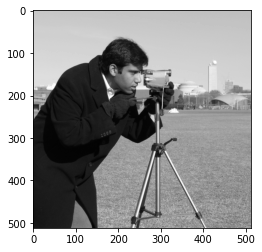

In [100]:
img = imageio.imread('imageio:camera.png')/255
plt.imshow(img, 'gray')

In [101]:
from matplotlib import cm

def plot_kernel(data, ax=None):
    rows, cols = data.shape
    y, x = np.meshgrid(np.arange(rows),np.arange(cols),indexing='ij')
    if ax == None:
        fig = plt.figure()
        ax = fig.gca(projection='3d')
    _min, _max = (np.min(data), np.max(data))
    ax.plot_surface(x, y, data.T, cmap=cm.jet, vmin=_min, vmax=_max)

def plot_images_and_kernel(img, img_filt, kernel):
    fig = plt.figure(figsize=(17,5))
    ax1 = fig.add_subplot(131)
    ax1.imshow(img, 'gray')
    ax1.title.set_text('Input image')
    ax2 = fig.add_subplot(132)
    ax2.imshow(img_filt, 'gray')
    ax2.title.set_text('Filtered image')
    ax3 = fig.add_subplot(133, projection='3d')
    plot_kernel(kernel, ax=ax3)
    ax3.title.set_text('Kernel')
    plt.show()

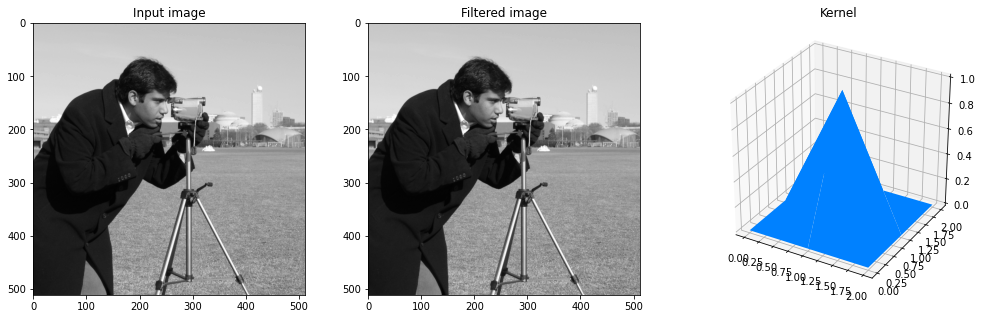

In [73]:
# Ejemplo del kernel identidad
kernel = np.zeros((3,3))
kernel[1,1] = 1
kernel /= kernel.sum()

img_filt = convolve2d(img, kernel, 'same')

plot_images_and_kernel(img, img_filt, kernel)

# 1. Filtros convolucionales

Para cada uno de los siguientes incisos implementar una función que devuelva el kernel en función de los parámetros especificados. Luego convolucionar la imagen con el kernel y utilizar la función plot_images_and_kernel() para graficar el resultado.

### 1.1. Implementar los siguientes filtros simétricos (invariantes a la rotación de 90°)

Pasabajos: Los kernels tendrán que ser del tamaño especificado por el usuario. Todos son de NxN donde N es impar.

1. Box (cuadrado) -> params: N

In [102]:
def crear_kernel_cuadrado(N):

  if N % 2 == 0:
    raise ValueError("N debe ser impar.")

  kernel = np.ones((N,N))
  kernel /= kernel.sum()

  return kernel

In [75]:
kernel_cuadrado = crear_kernel_cuadrado(7)

np.around(kernel_cuadrado, 4)

array([[0.0204, 0.0204, 0.0204, 0.0204, 0.0204, 0.0204, 0.0204],
       [0.0204, 0.0204, 0.0204, 0.0204, 0.0204, 0.0204, 0.0204],
       [0.0204, 0.0204, 0.0204, 0.0204, 0.0204, 0.0204, 0.0204],
       [0.0204, 0.0204, 0.0204, 0.0204, 0.0204, 0.0204, 0.0204],
       [0.0204, 0.0204, 0.0204, 0.0204, 0.0204, 0.0204, 0.0204],
       [0.0204, 0.0204, 0.0204, 0.0204, 0.0204, 0.0204, 0.0204],
       [0.0204, 0.0204, 0.0204, 0.0204, 0.0204, 0.0204, 0.0204]])

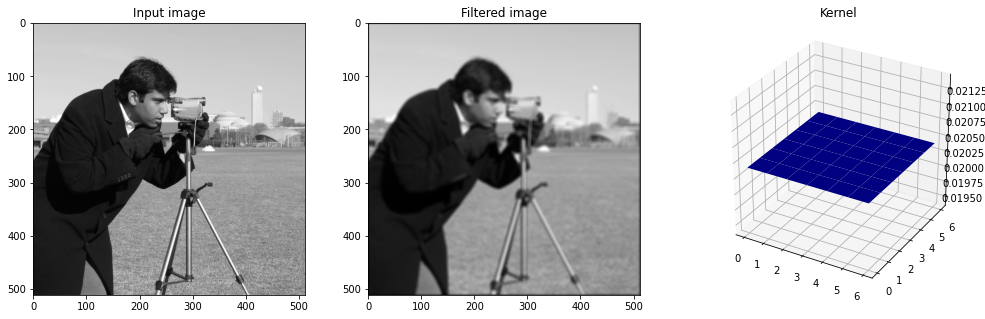

In [76]:
img_filt_kcuadrado = convolve2d(img, kernel_cuadrado, 'same')

plot_images_and_kernel(img, img_filt_kcuadrado, kernel_cuadrado)

2. Circle (circular) -> params: N

In [103]:
def crear_kernel_circular(N):

  if N % 2 == 0:
    raise ValueError("N debe ser impar.")

  # Para N = 3 creo el kernel manualmente para que el resultado sea una cruz en lugar de un cuadrado.
  
  if N == 3:

    kernel = np.array([[0,1,0],[1,1,1,],[0,1,0]],dtype=float)

  else:

    kernel = np.ones((N,N))

    centro = N//2

    for i in range(N):
      for j in range(N):
        
        distancia_al_centro = np.abs(centro - i) + np.abs(centro - j)

        if distancia_al_centro >= (N/2)+1.5:
          kernel[i,j] = 0

  kernel /= kernel.sum()
  
  return kernel

In [78]:
kernel_circular = crear_kernel_circular(7)

np.around(kernel_circular, 4)

array([[0.   , 0.   , 0.027, 0.027, 0.027, 0.   , 0.   ],
       [0.   , 0.027, 0.027, 0.027, 0.027, 0.027, 0.   ],
       [0.027, 0.027, 0.027, 0.027, 0.027, 0.027, 0.027],
       [0.027, 0.027, 0.027, 0.027, 0.027, 0.027, 0.027],
       [0.027, 0.027, 0.027, 0.027, 0.027, 0.027, 0.027],
       [0.   , 0.027, 0.027, 0.027, 0.027, 0.027, 0.   ],
       [0.   , 0.   , 0.027, 0.027, 0.027, 0.   , 0.   ]])

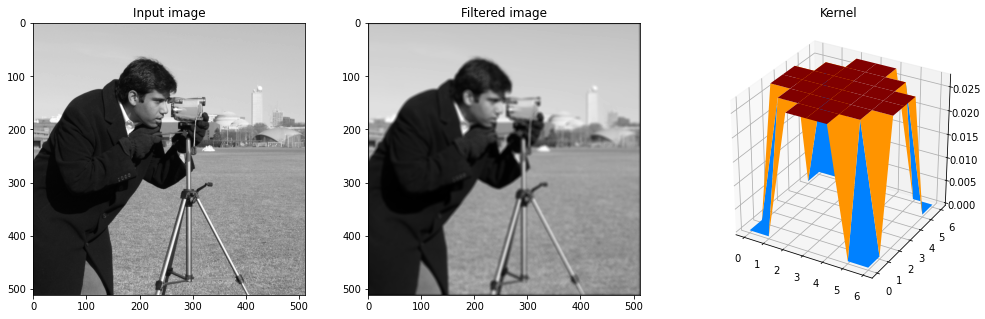

In [79]:
img_filt_kcircular = convolve2d(img, kernel_circular, 'same')

plot_images_and_kernel(img, img_filt_kcircular, kernel_circular)

3. Bartlett -> params: N

In [104]:
def crear_kernel_de_bartlett(N):

  if N % 2 == 0:
    raise ValueError("N debe ser impar.")

  kernel = np.ones(((N//2)+1,(N//2)+1))
  kernel = convolve2d(kernel, kernel)
  kernel /= kernel.sum()

  return kernel

In [81]:
kernel_de_bartlett = crear_kernel_de_bartlett(7)

np.around(kernel_de_bartlett, 4)

array([[0.0039, 0.0078, 0.0117, 0.0156, 0.0117, 0.0078, 0.0039],
       [0.0078, 0.0156, 0.0234, 0.0312, 0.0234, 0.0156, 0.0078],
       [0.0117, 0.0234, 0.0352, 0.0469, 0.0352, 0.0234, 0.0117],
       [0.0156, 0.0312, 0.0469, 0.0625, 0.0469, 0.0312, 0.0156],
       [0.0117, 0.0234, 0.0352, 0.0469, 0.0352, 0.0234, 0.0117],
       [0.0078, 0.0156, 0.0234, 0.0312, 0.0234, 0.0156, 0.0078],
       [0.0039, 0.0078, 0.0117, 0.0156, 0.0117, 0.0078, 0.0039]])

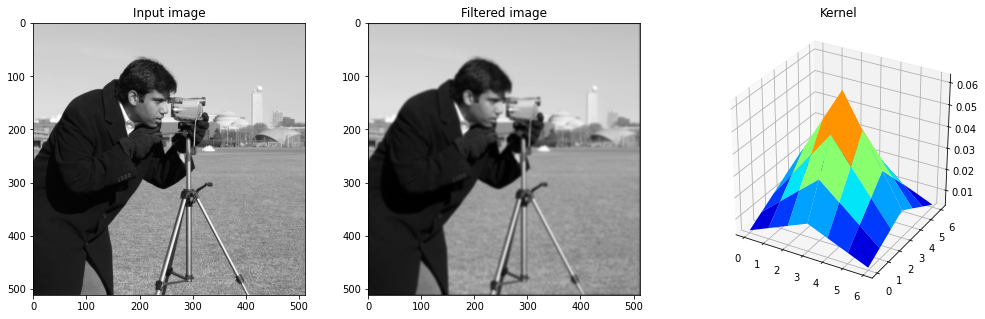

In [82]:
img_filt_kbartlett = convolve2d(img, kernel_de_bartlett, 'same')

plot_images_and_kernel(img, img_filt_kbartlett, kernel_de_bartlett)

4. Gaussian -> params: N, std

In [105]:
import scipy.stats as st

def crear_kernel_gaussiano(N, std):

  if N % 2 == 0:
    raise ValueError("N debe ser impar.")

  x = np.linspace(-std, std, N+1)
  kern1d = np.diff(st.norm.cdf(x))
  kernel = np.outer(kern1d, kern1d)
  kernel /= kernel.sum()

  return kernel

In [84]:
kernel_gaussiano = crear_kernel_gaussiano(7, 3)

np.around(kernel_gaussiano, 4)

array([[0.0002, 0.0012, 0.0035, 0.0049, 0.0035, 0.0012, 0.0002],
       [0.0012, 0.007 , 0.0196, 0.0278, 0.0196, 0.007 , 0.0012],
       [0.0035, 0.0196, 0.0555, 0.0783, 0.0555, 0.0196, 0.0035],
       [0.0049, 0.0278, 0.0783, 0.1107, 0.0783, 0.0278, 0.0049],
       [0.0035, 0.0196, 0.0555, 0.0783, 0.0555, 0.0196, 0.0035],
       [0.0012, 0.007 , 0.0196, 0.0278, 0.0196, 0.007 , 0.0012],
       [0.0002, 0.0012, 0.0035, 0.0049, 0.0035, 0.0012, 0.0002]])

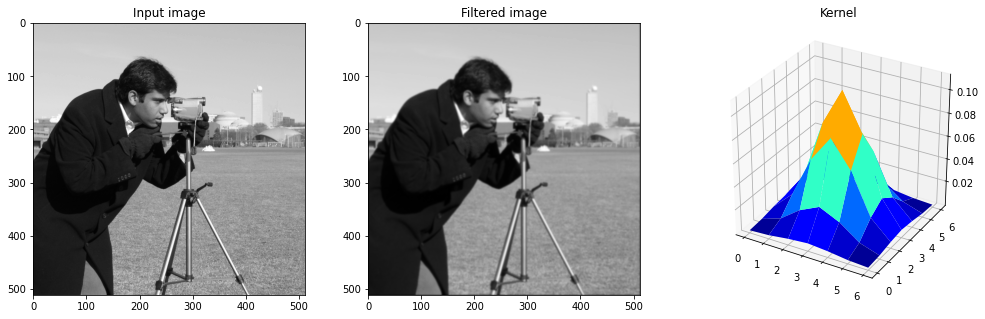

In [85]:
img_filt_kgaussiano = convolve2d(img, kernel_gaussiano, 'same')

plot_images_and_kernel(img, img_filt_kgaussiano, kernel_gaussiano)

Pasaaltos:

5. Laplace (4 y 8 vecinos) -> params: neighbors (entero que vale 4 u 8)

In [106]:
def crear_kernel_de_laplace(neighbors):

  if neighbors != 4 and neighbors!= 8:
    raise ValueError("neighbors debe valer 4 u 8.")

  if neighbors == 4:
    kernel = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])

  elif neighbors == 8:
    kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

  return kernel

In [87]:
kernel_de_laplace = crear_kernel_de_laplace(4)

kernel_de_laplace

array([[ 0, -1,  0],
       [-1,  4, -1],
       [ 0, -1,  0]])

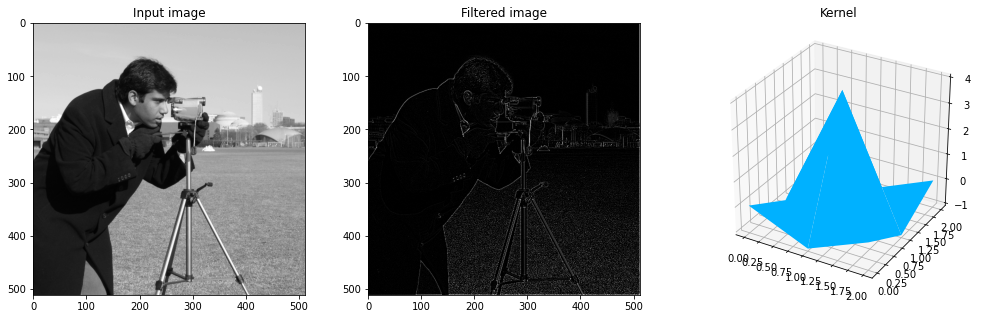

In [35]:
img_filt_klaplace = np.clip(convolve2d(img, kernel_de_laplace, 'same'), 0, 1)

plot_images_and_kernel(img, img_filt_klaplace, kernel_de_laplace)

6. Pasaaltos a partir de un pasabajos: PA = Id - PB -> params: los mismos que el pasabajos elegido

In [107]:
def crear_kernel_identidad(N):

  if N % 2 == 0:
    raise ValueError("N debe ser impar.") 

  kernel = np.zeros((N,N))
  kernel[N//2,N//2] = 1
  kernel /= kernel.sum()

  return kernel

In [108]:
def crear_kernel_pasaaltos(N, std):

  if N % 2 == 0:
    raise ValueError("N debe ser impar.")

  kernel = crear_kernel_identidad(N) - crear_kernel_gaussiano(N, std)

  return kernel

In [90]:
kernel_pasaaltos = crear_kernel_pasaaltos(7, 3)

np.around(kernel_pasaaltos, 3)

array([[-0.   , -0.001, -0.003, -0.005, -0.003, -0.001, -0.   ],
       [-0.001, -0.007, -0.02 , -0.028, -0.02 , -0.007, -0.001],
       [-0.003, -0.02 , -0.055, -0.078, -0.055, -0.02 , -0.003],
       [-0.005, -0.028, -0.078,  0.889, -0.078, -0.028, -0.005],
       [-0.003, -0.02 , -0.055, -0.078, -0.055, -0.02 , -0.003],
       [-0.001, -0.007, -0.02 , -0.028, -0.02 , -0.007, -0.001],
       [-0.   , -0.001, -0.003, -0.005, -0.003, -0.001, -0.   ]])

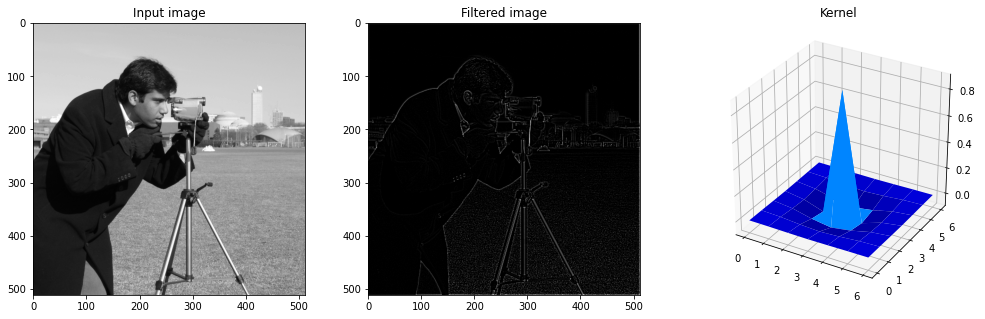

In [91]:
img_filt_kpasaaltos = np.clip(convolve2d(img, kernel_pasaaltos, 'same'), 0, 1)

plot_images_and_kernel(img, img_filt_kpasaaltos, kernel_pasaaltos)

Pasabanda:

7. Difference of Gaussian (DoG) -> params: N, std1, std2

In [109]:
def crear_kernel_dog(N, std1, std2):

  if N % 2 == 0:
    raise ValueError("N debe ser impar.")

  kernel = crear_kernel_gaussiano(N, std1) - crear_kernel_gaussiano(N, std2)

  return kernel

In [93]:
kernel_dog = crear_kernel_dog(7, 3, 1)

np.around(kernel_dog, 4)

array([[-0.0131, -0.0151, -0.015 , -0.0143, -0.015 , -0.0151, -0.0131],
       [-0.0151, -0.0131, -0.003 ,  0.0042, -0.003 , -0.0131, -0.0151],
       [-0.015 , -0.003 ,  0.0299,  0.0517,  0.0299, -0.003 , -0.015 ],
       [-0.0143,  0.0042,  0.0517,  0.083 ,  0.0517,  0.0042, -0.0143],
       [-0.015 , -0.003 ,  0.0299,  0.0517,  0.0299, -0.003 , -0.015 ],
       [-0.0151, -0.0131, -0.003 ,  0.0042, -0.003 , -0.0131, -0.0151],
       [-0.0131, -0.0151, -0.015 , -0.0143, -0.015 , -0.0151, -0.0131]])

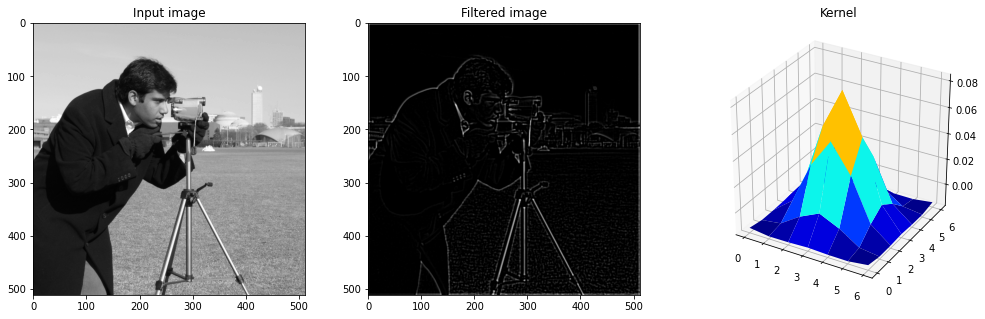

In [94]:
img_filt_kdog = np.clip(convolve2d(img, kernel_dog, 'same'), 0, 1)

plot_images_and_kernel(img, img_filt_kdog, kernel_dog)

Otros:

8. Mejora de contraste (combinación del filtro identidad más "un poco" de pasaaltos) -> params: los del pasaaltos y la constante de proporción de pasaaltos sumado

In [110]:
def crear_kernel_contraste(neighbors, constante):

  if neighbors != 4 and neighbors!= 8:
    raise ValueError("neighbors debe valer 4 u 8.")

  kernel = crear_kernel_identidad(3) + constante * crear_kernel_de_laplace(neighbors)

  return kernel

In [96]:
kernel_contraste = crear_kernel_contraste(neighbors = 8, constante = 0.2)

kernel_contraste

array([[-0.2, -0.2, -0.2],
       [-0.2,  2.6, -0.2],
       [-0.2, -0.2, -0.2]])

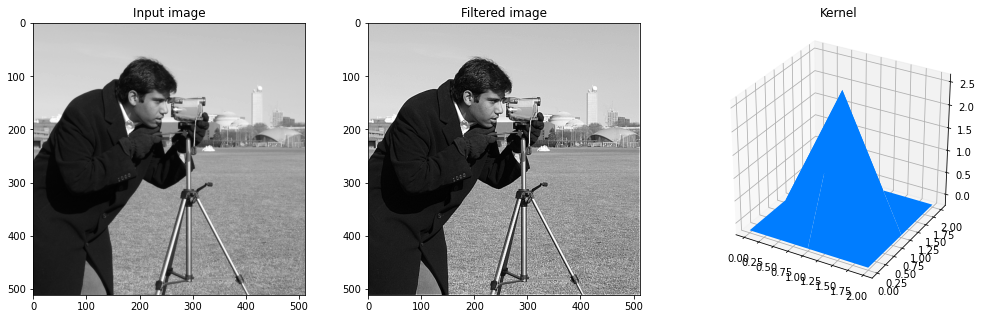

In [97]:
img_filt_kcontraste = np.clip(convolve2d(img, kernel_contraste, 'same'), 0, 1)

plot_images_and_kernel(img, img_filt_kcontraste, kernel_contraste)

### 1.2. Implementar los siguientes filtros direccionales (asimétricos)

9. Sobel 3x3 -> Calcular valor absoluto de gradientes Gx y Gy y también en módulo y fase. Para graficar la fase, normalizar al rango [0,1] y utilizar un mapa de colores que no sea escala de grises.

In [111]:
def crear_kernel_de_sobel(orientacion = 'N'):

  kernel_lados = np.array([[-1,-2,-1], [0,0,0], [1,2,1]])
  kernel_esquinas = np.array([[0,-1,-2], [1,0,-1], [2,1,0]])

  if orientacion == 'N':
    kernel = kernel_lados

  elif orientacion == 'NE':
    kernel = kernel_esquinas

  elif orientacion == 'E':
    kernel = np.rot90(kernel_lados, k = 3)

  elif orientacion == 'SE':
    kernel = np.rot90(kernel_esquinas, k = 3)

  elif orientacion == 'S':
    kernel = np.rot90(kernel_lados, k = 2)

  elif orientacion == 'SO':
    kernel = np.rot90(kernel_esquinas, k = 2)

  elif orientacion == 'O':
    kernel = np.rot90(kernel_lados, k = 1)

  elif orientacion == 'NO':
    kernel = np.rot90(kernel_esquinas, k = 1)

  return kernel

In [119]:
kernel_sobel_sur = crear_kernel_de_sobel(orientacion = 'S')

kernel_sobel_sur

array([[ 1,  2,  1],
       [ 0,  0,  0],
       [-1, -2, -1]])

In [120]:
kernel_sobel_este = crear_kernel_de_sobel(orientacion = 'E')

kernel_sobel_este

array([[ 1,  0, -1],
       [ 2,  0, -2],
       [ 1,  0, -1]])

In [113]:
Gx = convolve2d(img, kernel_sobel_sur, 'same')

In [114]:
Gy = convolve2d(img, kernel_sobel_este, 'same')

In [129]:
Gx_abs = np.abs(Gx)

np.around(Gx_abs, 3)

array([[2.349, 3.125, 3.125, ..., 2.98 , 2.98 , 2.235],
       [0.012, 0.016, 0.012, ..., 0.012, 0.004, 0.   ],
       [0.004, 0.008, 0.   , ..., 0.   , 0.   , 0.   ],
       ...,
       [0.004, 0.008, 0.004, ..., 0.122, 0.031, 0.008],
       [0.   , 0.   , 0.004, ..., 0.086, 0.29 , 0.133],
       [0.294, 0.396, 0.396, ..., 2.337, 2.384, 1.871]])

In [130]:
Gy_abs = np.abs(Gy)

np.around(Gy_abs, 3)

array([[2.349, 0.004, 0.004, ..., 0.008, 0.008, 2.235],
       [3.125, 0.008, 0.012, ..., 0.004, 0.004, 2.98 ],
       [3.125, 0.008, 0.008, ..., 0.   , 0.   , 2.98 ],
       ...,
       [0.396, 0.024, 0.02 , ..., 0.506, 0.149, 2.094],
       [0.392, 0.024, 0.012, ..., 0.165, 0.102, 2.18 ],
       [0.294, 0.02 , 0.004, ..., 0.071, 0.024, 1.745]])

In [131]:
modulo = np.abs(Gx + 1j*Gy)

np.around(modulo, 3)

array([[3.322, 3.125, 3.125, ..., 2.98 , 2.98 , 3.161],
       [3.126, 0.018, 0.017, ..., 0.012, 0.006, 2.98 ],
       [3.125, 0.011, 0.008, ..., 0.   , 0.   , 2.98 ],
       ...,
       [0.396, 0.025, 0.02 , ..., 0.52 , 0.152, 2.094],
       [0.392, 0.024, 0.012, ..., 0.186, 0.308, 2.184],
       [0.416, 0.397, 0.396, ..., 2.338, 2.384, 2.558]])

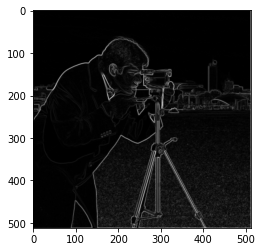

In [140]:
plt.imshow(modulo, 'gray')

In [137]:
fase = np.angle(Gx + 1j*Gy)

fase = (fase + np.pi) / (2 * np.pi) 

np.around(fase, 3)

array([[0.625, 0.5  , 0.5  , ..., 0.5  , 0.5  , 0.375],
       [0.751, 0.074, 0.875, ..., 0.551, 0.625, 0.25 ],
       [0.75 , 0.375, 0.75 , ..., 0.5  , 0.5  , 0.25 ],
       ...,
       [0.752, 0.801, 0.219, ..., 0.212, 0.783, 0.249],
       [0.75 , 0.75 , 0.301, ..., 0.327, 0.554, 0.26 ],
       [0.875, 0.992, 0.002, ..., 0.995, 0.998, 0.119]])

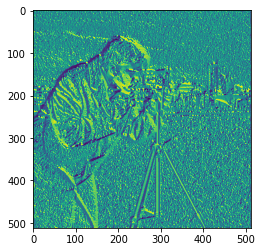

In [138]:
plt.imshow(fase)

### 1.3. Implementar un detector de bordes a partir del filtro de Sobel

Aplicar un umbral al módulo del filtro de Sobel para obtener una imagen binaria con 1s en los bordes y 0s en el resto

In [149]:
def detectar_border(imagen, umbral):

  kernel_sobel_sur = crear_kernel_de_sobel(orientacion = 'S')

  kernel_sobel_este = crear_kernel_de_sobel(orientacion = 'E')

  Gx = convolve2d(img, kernel_sobel_sur, 'same')

  Gy = convolve2d(img, kernel_sobel_este, 'same')

  modulo = np.abs(Gx + 1j*Gy)

  imagen_binaria = np.where(modulo >= umbral, 1, 0)

  return imagen_binaria

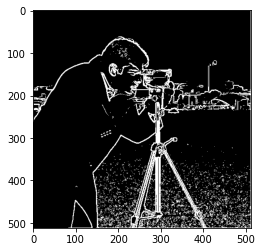

In [153]:
imagen_binaria = detectar_border(img, umbral = 0.5)

plt.imshow(imagen_binaria, 'gray')

### 1.4. Escribir una breve descripción sobre cómo funciona el detector de bordes de Canny

El detector de bordes de Canny funciona por medio de los siguientes pasos:

1. __Reducir el ruido.__ El ruido presente en la imagen puede hacer que se detecten bordes donde no los hay. Para evitar esto, lo primero que se debe hacer es utilizar un filtro gaussiano para 'suavizar' el ruido.
2. __Calcular el gradiente de la imagen.__ Para esto, el algoritmo de Canny utiliza los filtros de Sobel. La intensidad del gradiente se calcula como $\sqrt{Gx^2 + Gy^2}$.
3. __Afinar los bordes.__ Se comparan los gradientes de cada píxel con los de píxeles vecinos en relación a la dirección del gradiente. Si el gradiente en el píxel no es mayor que el de sus vecinos, se lo suprime. Como resultado se obtiene un borde más afinado.
4. __Aplicar un umbral doble.__ Se elige un umbral superior y un umbral inferior. Los píxeles con valores de gradiente mayores al umbral superior son considerados bordes fuertes. Los píxeles con valores de gradiente que se encuentran entre el umbral superior y el umbral inferior son considerados bordes débiles.
5. __Filtrar bordes débiles.__ Los bordes débiles que no estén conectados a un borde fuerte son suprimidos para reducir el ruido.